In [17]:
library(ggplot2)
results = read.csv("multiplication.csv")
data = aggregate( time ~ size:method, data=results, FUN=mean)
data$sd = aggregate( time ~ size:method, data=results, FUN=sd)$time

In [18]:
data

size,method,time,sd
100,better,0.0053422,9.078575e-04
200,better,0.0419252,1.948611e-03
300,better,0.1347724,1.745692e-03
400,better,0.3142906,3.571934e-03
500,better,0.6134266,7.934911e-03
600,better,1.1031270,9.271579e-02
700,better,1.6947652,2.268937e-02
800,better,2.5936628,1.895045e-01
900,better,3.5930148,7.152765e-02
1000,better,4.9065272,4.766994e-02


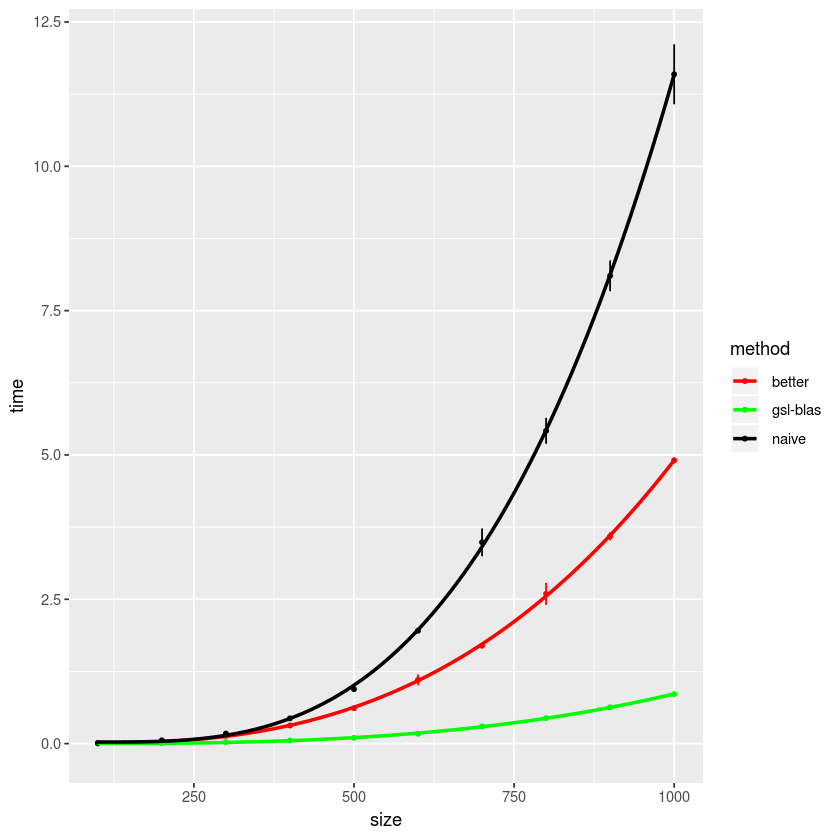

In [19]:
ggplot(data, aes(size, time, color=method)) +
geom_point(size=1.0)+
geom_smooth(method="lm", se=TRUE, fill=NA, formula=y ~ poly(x, 3, raw=TRUE))+
geom_errorbar(aes(ymin=time-sd, ymax=time+sd), width=.3) +
scale_color_manual(values=c("red", "green", "black"))+
xlab("size") + ylab("time")